## CROP RECOMMENDATION PROJECT PART 1

### In this machine leraning project will do some data analysis on the crop recommendation dataset and then train a model to recomend the type of crop to plant based on

#### 1 the amount of nitrogen in soil
#### 2 the mount of phosphorus in soil
#### 3 the mount of temperature in soil
#### 4 the mount of humidity in soil
#### 5 the mount of ph in soil
#### 6 the mount of rainfall

## Our target varaible will be rice, maize or mango, this will be a classification problem


## First we load the libraries will use

In [154]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import seaborn as sns

## Then we have to load our data as a dataframe using the pandas

In [155]:
data = pd.read_csv('Crop_recommendation.csv')

##  We start some data analysis so that we can get more insights about the data
#### head() function is used to get the first five rows from our data

In [156]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


## Checking the data types of the columns

In [157]:
data.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

## Checking if we have any null values in our data

In [158]:
data.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

## we can see that Unnamed: 8 has 2200 null values and Unnamed: 9 has 2200 null values

In [159]:
data.head(2)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN


## They are two columns we can remove from the data frame because they only contain null values
## To verify they only contain null values we can use value_counts

In [160]:
data['Unnamed: 8'].value_counts()

Series([], Name: count, dtype: int64)

In [161]:
data['Unnamed: 9'].value_counts()

Series([], Name: count, dtype: int64)

## after finding these values dont have any values we can just drop them using drop() method

In [162]:
data.drop('Unnamed: 8',axis = 1,inplace = True)

In [163]:
data.drop('Unnamed: 9',axis = 1,inplace =True)

## just to verify the columns a droped we print the data 

In [164]:
data

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [165]:
data

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## We check all the values in the target value label, to just make this simple will  <br>  create a data frame for maize, rice and mango

In [166]:
data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [167]:
new_df = data[(data['label'] == 'rice') | (data['label'] == 'mango') | (data['label'] == 'maize') ]

In [168]:
new_df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1195,19,38,26,31.484517,48.779263,4.525722,93.172220,mango
1196,21,21,30,27.698193,51.415932,5.403908,100.772070,mango
1197,22,18,33,30.412358,52.481006,6.621624,93.923759,mango
1198,31,20,30,32.177520,54.013527,6.207496,91.887661,mango


## We verify our dataset only contains rice, maize and mango as the targets

In [169]:
new_df.label.unique()

array(['rice', 'maize', 'mango'], dtype=object)

## We just get  a small amount of dateset from our main set to create  our base model

In [170]:
new_df.drop(['Nitrogen','phosphorus','potassium','rainfall'], axis = 'columns',inplace = True)

C:\Users\26097\AppData\Local\Temp\ipykernel_20260\502994565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['Nitrogen','phosphorus','potassium','rainfall'], axis = 'columns',inplace = True)


In [171]:
new_df

,temperature,humidity,ph,label
0,20.879744,82.002744,6.502985,rice
1,21.770462,80.319644,7.038096,rice
2,23.004459,82.320763,7.840207,rice
3,26.491096,80.158363,6.980401,rice
4,20.130175,81.604873,7.628473,rice
...,...,...,...,...
1195,31.484517,48.779263,4.525722,mango
1196,27.698193,51.415932,5.403908,mango
1197,30.412358,52.481006,6.621624,mango
1198,32.177520,54.013527,6.207496,mango


## We do some data visualisations

## scatter plot 

<AxesSubplot: xlabel='label', ylabel='ph'>

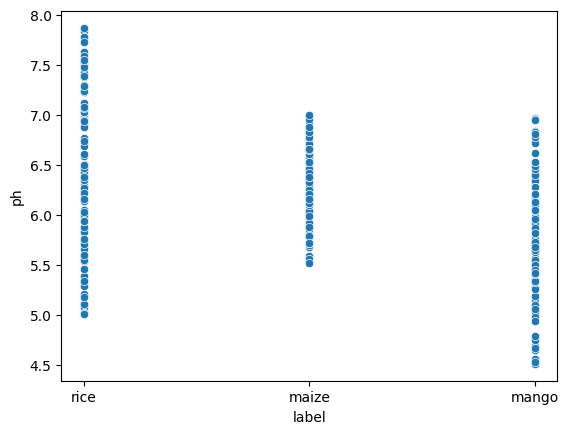

In [175]:
sns.scatterplot(x = new_df['label'], y = new_df['ph'])


<AxesSubplot: xlabel='label', ylabel='humidity'>

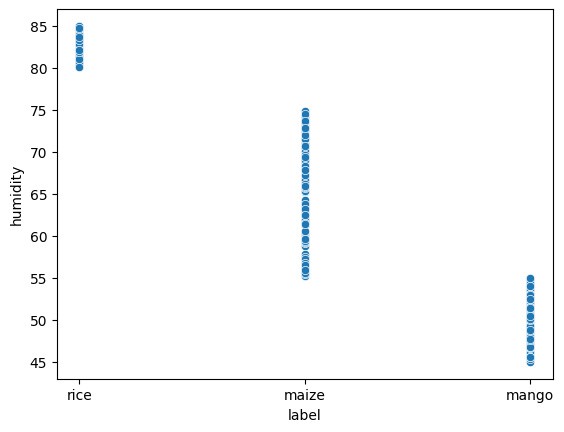

In [181]:
sns.scatterplot(x = new_df['label'], y = new_df['humidity'])

## kde plots to check  the distributions

C:\Users\26097\AppData\Local\Temp\ipykernel_20260\2783740984.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'ph', data = new_df,hue = 'label',shade = True)


<AxesSubplot: xlabel='ph', ylabel='Density'>

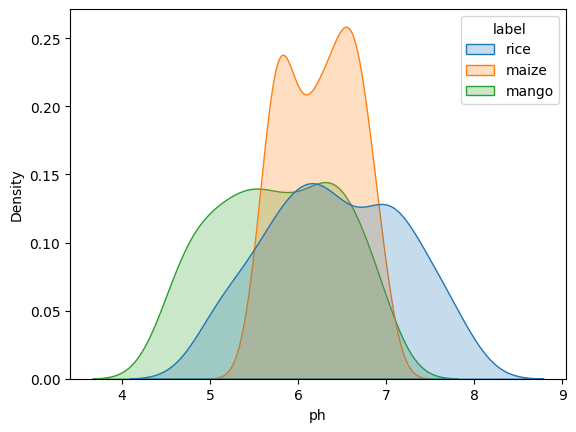

In [182]:
sns.kdeplot(x = 'ph', data = new_df,hue = 'label',shade = True)

<AxesSubplot: xlabel='ph', ylabel='Density'>

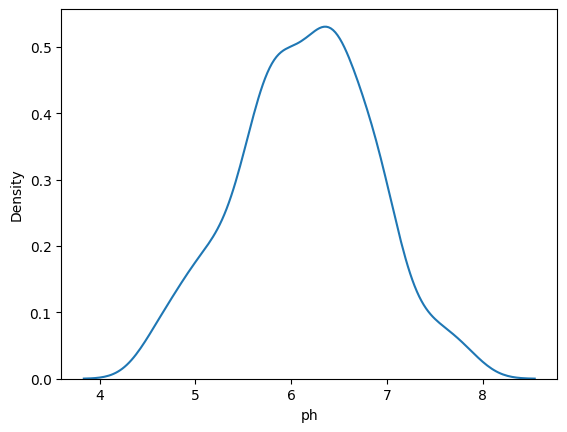

In [183]:
sns.kdeplot(new_df['ph'])

## Box plot to check any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2342479d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d234247f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d234247730>],
 'medians': [<matplotlib.lines.Line2D at 0x1d234284490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d234284730>],
 'means': []}

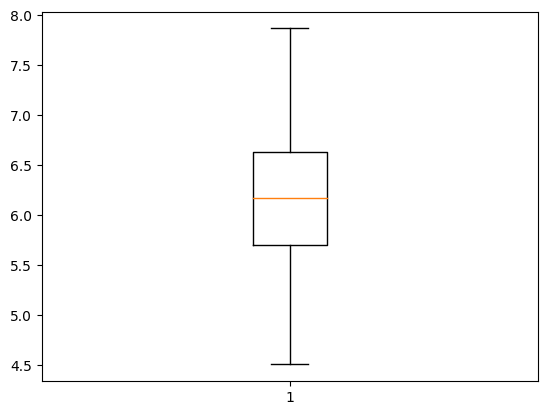

In [185]:
plt.boxplot(new_df['ph'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2342d3eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d23433c430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2342d3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d23433c970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d23433cc10>],
 'means': []}

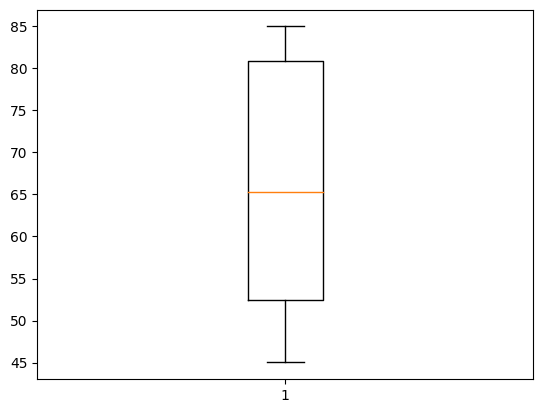

In [187]:
plt.boxplot(new_df['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d23439cac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d23439d000>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d23439c880>],
 'medians': [<matplotlib.lines.Line2D at 0x1d23439d540>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d23439d7e0>],
 'means': []}

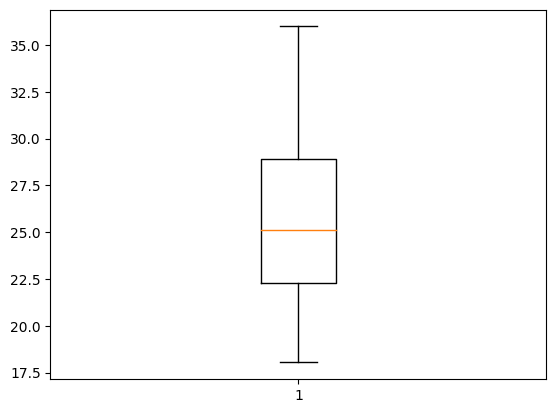

In [188]:
plt.boxplot(new_df['temperature'])

## from the graphs we can conclude the data is good for model traing we can now get the x and the y 

In [123]:
new_df.columns

Index(['temperature', 'humidity', 'ph', 'label'], dtype='object')

## we get our x features  and the target y

In [124]:
x = new_df[['temperature', 'humidity', 'ph']]

In [125]:
y  = new_df['label']

## Machine learning understands well numbers so we label encode our target variables so
+ 2 represensts **rice**
+ 0 represents **mango**
+ 1 represents **maize**

In [74]:
label_encoder = LabelEncoder()

# Fit the label encoder on the target variable and transform it
y_encoded = LabelEncoder().fit_transform(y)

In [75]:
mg_df['label2'] = y_encoded

In [76]:
mg_df.head(150)

,temperature,humidity,ph,label,maize,mango,label2
0,20.879744,82.002744,6.502985,rice,False,False,2
1,21.770462,80.319644,7.038096,rice,False,False,2
2,23.004459,82.320763,7.840207,rice,False,False,2
3,26.491096,80.158363,6.980401,rice,False,False,2
4,20.130175,81.604873,7.628473,rice,False,False,2
...,...,...,...,...,...,...,...
145,20.583140,69.001286,6.499936,maize,True,False,0
146,24.875028,68.742483,6.265564,maize,True,False,0
147,20.037282,56.356068,6.727303,maize,True,False,0
148,25.952633,61.890822,6.325235,maize,True,False,0


## We now split how  x and y into train and test train data gets 80% and tests data 20%

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size = 0.2)

## the model will use is LogisticRegression

In [190]:
model = linear_model.LogisticRegression(max_iter=1000)

In [194]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

## Machine learning understands well numbers so we label encoded our target variables so
+ 2 represensts **rice**
+ 0 represents **mango**
+ 1 represents **maize**
## so we can get the first row and try to make a prediction from our dataset using indexlocation iloc[ 0 ]

In [209]:
new_df.iloc[0]

temperature    20.879744
humidity       82.002744
ph              6.502985
label               rice
Name: 0, dtype: object

In [211]:
prediction = model.predict([[20.879744,82.002744,6.502985]])

C:\Users\26097\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [213]:
prediction[0]

2

## We can see the model has made an accurate prediction which is 2 for rice and rice was encoded to 2

## we can now use some Matrics to measure the perfomance of our model 

## We start with mean squared error which should be near to zero for a good model

In [83]:
MSE =  mean_squared_error(y_test,model.predict(x_test))

In [84]:
MSE

0.0

## Second we find the model Accuracy

In [87]:
ACURACY  = accuracy_score(y_test,model.predict(x_test))

In [88]:
ACURACY

1.0

## What can say about this model, is it a good model or not..?

## In part two will try to use all the features,create new features test different algorithms and see how these models will perfom lastely will also try to deploy the model

**Name:Joshua simwawa **<br>
**Contact:0971136978 **